In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
df=pd.read_csv("C:/Users/Aishwarya Kumar/Desktop/Project/Hackathon projects/upvotes/train_NIR5Yl1.csv")
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [198]:
df.shape

(330045, 7)

In [199]:
df.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

No Null Values are present 

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [201]:
for i in df:
    a=df[i].value_counts()
    print(i,"\n",a)

ID 
 2047      1
209715    1
2900      1
853       1
6998      1
         ..
85123     1
95364     1
97413     1
91270     1
4098      1
Name: ID, Length: 330045, dtype: int64
Tag 
 c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64
Reputation 
 0.0         6632
1.0         1077
11.0        1032
16.0        1030
6.0          980
            ... 
158927.0       1
17608.0        1
42819.0        1
35695.0        1
15416.0        1
Name: Reputation, Length: 16527, dtype: int64
Answers 
 2.0     71549
1.0     65158
3.0     56331
4.0     40485
5.0     27871
        ...  
76.0        1
55.0        1
59.0        1
66.0        1
53.0        1
Name: Answers, Length: 63, dtype: int64
Username 
 4118     797
17878    608
45704    483
23223    413
6697     408
        ... 
33671      1
64392      1
62345      1
60298      1
0          1
Name: Username, Length: 141802, dtype: int64
Views 
 87.0       101
77.0        

In [202]:
df.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


## Univariate Analysis

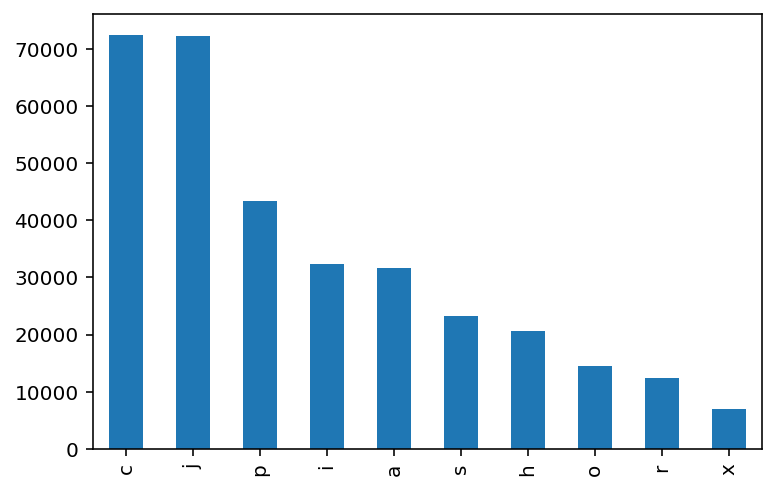

In [203]:
df["Tag"].value_counts().plot(kind="bar")

Questions on category c and j have been asked more frequently.
Questions on category x have been asked the least.

In [204]:
df_new=df.drop(['Upvotes','ID','Username'],axis=1)
df_new

,Tag,Reputation,Answers,Views
0,a,3942.0,2.0,7855.0
1,a,26046.0,12.0,55801.0
2,c,1358.0,4.0,8067.0
3,a,264.0,3.0,27064.0
4,c,4271.0,4.0,13986.0
...,...,...,...,...
330040,c,36.0,2.0,1063.0
330041,c,1649.0,2.0,23319.0
330042,c,6178.0,2.0,2453.0
330043,j,89.0,2.0,2107.0


In [206]:
numerical= df_new.select_dtypes(include =['float64','int64'])
numerical

,Reputation,Answers,Views
0,3942.0,2.0,7855.0
1,26046.0,12.0,55801.0
2,1358.0,4.0,8067.0
3,264.0,3.0,27064.0
4,4271.0,4.0,13986.0
...,...,...,...
330040,36.0,2.0,1063.0
330041,1649.0,2.0,23319.0
330042,6178.0,2.0,2453.0
330043,89.0,2.0,2107.0


In [207]:
catg=df.select_dtypes(['object'])
catg

,Tag
0,a
1,a
2,c
3,a
4,c
...,...
330040,c
330041,c
330042,c
330043,j


### Z-scaling

In [208]:
for i in numerical:
    numerical[i]=(numerical[i]-numerical[i].min())/(numerical[i].max()-numerical[i].min())

In [209]:
numerical

,Reputation,Answers,Views
0,0.003782,0.026316,0.001500
1,0.024986,0.157895,0.010666
2,0.001303,0.052632,0.001540
3,0.000253,0.039474,0.005172
4,0.004097,0.052632,0.002672
...,...,...,...
330040,0.000035,0.026316,0.000201
330041,0.001582,0.026316,0.004456
330042,0.005927,0.026316,0.000467
330043,0.000085,0.026316,0.000401


### Label Encoding

In [210]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
catg["Tag"]=lr.fit_transform(df["Tag"])
catg

,Tag
0,0
1,0
2,1
3,0
4,1
...,...
330040,1
330041,1
330042,1
330043,4


In [211]:
d=pd.concat([numerical,catg,df["Upvotes"]],axis=1)
d

,Reputation,Answers,Views,Tag,Upvotes
0,0.003782,0.026316,0.001500,0,42.0
1,0.024986,0.157895,0.010666,0,1175.0
2,0.001303,0.052632,0.001540,1,60.0
3,0.000253,0.039474,0.005172,0,9.0
4,0.004097,0.052632,0.002672,1,83.0
...,...,...,...,...,...
330040,0.000035,0.026316,0.000201,1,0.0
330041,0.001582,0.026316,0.004456,1,73.0
330042,0.005927,0.026316,0.000467,1,15.0
330043,0.000085,0.026316,0.000401,4,3.0


### Train test split

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
x=d.drop(["Upvotes"],axis=1)
y=d["Upvotes"]

In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)   

In [215]:
print("Size of x train is",x_train.shape)
print("Size of y train is",y_train.shape)
print("Size of x test is",x_test.shape)
print("Size of y test is",y_test.shape)

Size of x train is (231031, 4)
Size of y train is (231031,)
Size of x test is (99014, 4)
Size of y test is (99014,)


### Linear Regression

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [217]:
lm = LinearRegression()
lm.fit(x_train, y_train)
sfs_lm_pred=lm.predict(x_test)
print(sfs_lm_pred)
print('LR Train Score: ',lm.score(x_train,y_train))
print('LR Test Score: ',lm.score(x_test,y_test))
print('LM MAE :',mean_absolute_error(y_test,sfs_lm_pred))
print('LM RMSE :',np.sqrt(mean_squared_error(y_test,sfs_lm_pred)))

[-290.14452855    7.434096   -357.6557699  ... -384.93758539  468.96922965
 -166.63863915]
LR Train Score:  0.24278265178149316
LR Test Score:  0.31427313153833547
LM MAE : 618.46032088791
LM RMSE : 2175.9433358183883


### Regularization

In [100]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
lambdas=np.linspace(1,100,100)
params={'alpha':lambdas}
model=Ridge(fit_intercept=True)
grid_search=GridSearchCV(model,param_grid=params,cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(x_train,y_train)
ridge_model=grid_search.best_estimator_
ridge_model.fit(x_train,y_train)
print(list(zip(x_train.columns,ridge_model.coef_)))
ridge_pred=grid_search.predict(x_test)
print('Ridge RMSE :',np.sqrt(mean_squared_error(y_test,ridge_pred)))

[('Reputation', 962.1716258330205), ('Answers', -151.76211868162684), ('Username', -13.107687232992854), ('Views', 1713.365356166178), ('Tag', 7.6543815904404795)]
Ridge RMSE : 2175.7809724034764


In [85]:
lambdas=np.linspace(1,100,100)
params={'alpha':lambdas}
model=Lasso(fit_intercept=True)
grid_search=GridSearchCV(model,param_grid=params,cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(x_train,y_train)
lasso_model=grid_search.best_estimator_
lasso_model.fit(x_train,y_train)
print(list(zip(x_train.columns,lasso_model.coef_)))
lasso_pred=lasso_model.predict(x_test)
print('Lasso RMSE :',np.sqrt(mean_squared_error(y_test,lasso_pred)))

[('ID', -0.0), ('Reputation', 859.7807689998015), ('Answers', -0.0), ('Username', -0.0), ('Views', 1542.9925698916823), ('Tag', 0.0)]
Lasso RMSE : 2157.6964953386937


In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pred=rf.predict(x_test)
print(rf_pred)
print('RF RMSE :',np.sqrt(mean_squared_error(y_test,rf_pred)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[35.9 33.6  5.4 ...  3.7 60.5 28.4]
RF RMSE : 1038.6569048952663


In [53]:
from lightgbm import LGBMRegressor
lgb=LGBMRegressor()
lgb.fit(x_train,y_train)
lgb_pred=lgb.predict(x_test)
print('RF RMSE :',np.sqrt(mean_squared_error(y_test,lgb_pred)))

RF RMSE : 1512.864823249746


In [54]:
import xgboost as xgb

In [55]:
xgbc = xgb.XGBRegressor()
xgbc.fit(x_train,y_train)
y_test_pred=xgbc.predict(x_test)
print('RF RMSE :',np.sqrt(mean_squared_error(y_test,y_test_pred)))

RF RMSE : 976.5502234841098


In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [218]:
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
y_train_predicted = poly_model.predict(x_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))
print('Poly RMSE :',np.sqrt(mean_squared_error(y_test,y_test_predict)))

Poly RMSE : 786.8176049328878


## Test Data

In [219]:
df_test=pd.read_csv("C:/Users/Aishwarya Kumar/Desktop/Project/Hackathon projects/upvotes/test_8i3B3FC.csv")
df_test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [220]:
df_test_new=df_test.drop(['ID','Username'],axis=1)
df_test_new

,Tag,Reputation,Answers,Views
0,a,5645.0,3.0,33200.0
1,c,24511.0,6.0,2730.0
2,i,927.0,1.0,21167.0
3,i,21.0,6.0,18528.0
4,i,4475.0,10.0,57240.0
...,...,...,...,...
141443,j,4681.0,4.0,2469.0
141444,j,7782.0,3.0,18998.0
141445,p,435.0,5.0,57048.0
141446,o,176.0,3.0,10193.0


In [221]:
numerical= df_test_new.select_dtypes(include =['float64','int64'])
numerical

,Reputation,Answers,Views
0,5645.0,3.0,33200.0
1,24511.0,6.0,2730.0
2,927.0,1.0,21167.0
3,21.0,6.0,18528.0
4,4475.0,10.0,57240.0
...,...,...,...
141443,4681.0,4.0,2469.0
141444,7782.0,3.0,18998.0
141445,435.0,5.0,57048.0
141446,176.0,3.0,10193.0


In [222]:
catg=df_test.select_dtypes(['object'])
catg

,Tag
0,a
1,c
2,i
3,i
4,i
...,...
141443,j
141444,j
141445,p
141446,o


### Z-scaling

In [223]:
for i in numerical:
    numerical[i]=(numerical[i]-numerical[i].min())/(numerical[i].max()-numerical[i].min())

In [224]:
numerical

,Reputation,Answers,Views
0,0.005415,0.041096,0.006632
1,0.023513,0.082192,0.000544
2,0.000889,0.013699,0.004228
3,0.000020,0.082192,0.003700
4,0.004293,0.136986,0.011436
...,...,...,...
141443,0.004490,0.054795,0.000492
141444,0.007465,0.041096,0.003794
141445,0.000417,0.068493,0.011397
141446,0.000169,0.041096,0.002035


### Label Encoding

In [225]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
catg["Tag"]=lr.fit_transform(df_test["Tag"])
catg

,Tag
0,0
1,1
2,3
3,3
4,3
...,...
141443,4
141444,4
141445,6
141446,5


In [226]:
d=pd.concat([numerical,catg],axis=1)
d

,Reputation,Answers,Views,Tag
0,0.005415,0.041096,0.006632,0
1,0.023513,0.082192,0.000544,1
2,0.000889,0.013699,0.004228,3
3,0.000020,0.082192,0.003700,3
4,0.004293,0.136986,0.011436,3
...,...,...,...,...
141443,0.004490,0.054795,0.000492,4
141444,0.007465,0.041096,0.003794,4
141445,0.000417,0.068493,0.011397,6
141446,0.000169,0.041096,0.002035,5


In [227]:
y_test_predict = poly_model.predict(poly_features.fit_transform(d))

In [228]:
submission=pd.DataFrame()
submission["ID"]=df_test["ID"]
submission["Upvotes"]=y_test_predict
submission.to_csv("Submission.csv")

In [229]:
submission

,ID,Upvotes
0,366953,230.383001
1,71864,137.366298
2,141692,28.148306
3,316833,23.508195
4,440445,336.909345
...,...,...
141443,47187,30.803096
141444,329126,181.031500
141445,282334,65.773825
141446,386629,13.867643
